In [51]:
!pip install yfinance pandas numpy scikit-learn matplotlib seaborn


In [52]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Fetch Dataset from yahoo finance

In [53]:


stock_data = yf.download("AAPL", start="2020-01-01", end="2021-12-31")
stock_data = stock_data[['Close', 'Volume']]
stock_data.dropna(inplace=True)



C:\Users\asus\AppData\Local\Temp\ipykernel_12012\1371815878.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download("AAPL", start="2020-01-01", end="2021-12-31")
[*********************100%***********************]  1 of 1 completed


First 5 rows of Dataset

In [54]:

sns.set(style="whitegrid") #seaborn

print("📌 First 5 rows of the dataset:")
display(stock_data.head())


📌 First 5 rows of the dataset:


Price,Close,Volume
Ticker,AAPL,AAPL
Date,,
2020-01-02,72.620842,135480400
2020-01-03,71.914818,146322800
2020-01-06,72.487846,118387200
2020-01-07,72.146935,108872000
2020-01-08,73.307518,132079200


Rows and Coloumns

In [55]:
print("Shape of the dataset:", stock_data.shape)

Shape of the dataset: (504, 2)


Stats and Description

In [56]:

print("\n📌 Summary Statistics:")
display(stock_data.describe())



📌 Summary Statistics:


Price,Close,Volume
Ticker,AAPL,AAPL
count,504.000000,5.040000e+02
mean,115.202392,1.242302e+08
std,29.047422,6.316090e+07
min,54.378586,4.100000e+07
25%,88.970434,8.119942e+07
50%,120.808464,1.088506e+08
75%,138.152805,1.478633e+08
max,176.996689,4.265100e+08


Check for missing values

In [57]:

print("\n📌 Missing Values:")
print(stock_data.isnull().sum())


📌 Missing Values:
Price   Ticker
Close   AAPL      0
Volume  AAPL      0
dtype: int64


Graph of closing price

C:\Users\asus\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


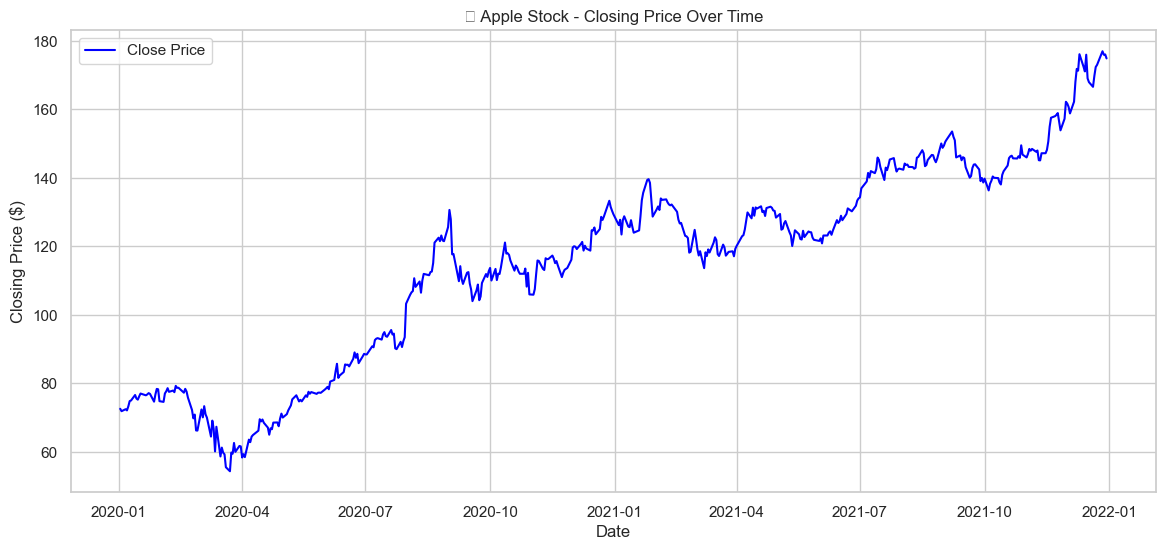

In [58]:

plt.figure(figsize=(14, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.title("📈 Apple Stock - Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.show()

Correlation heatmap

C:\Users\asus\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


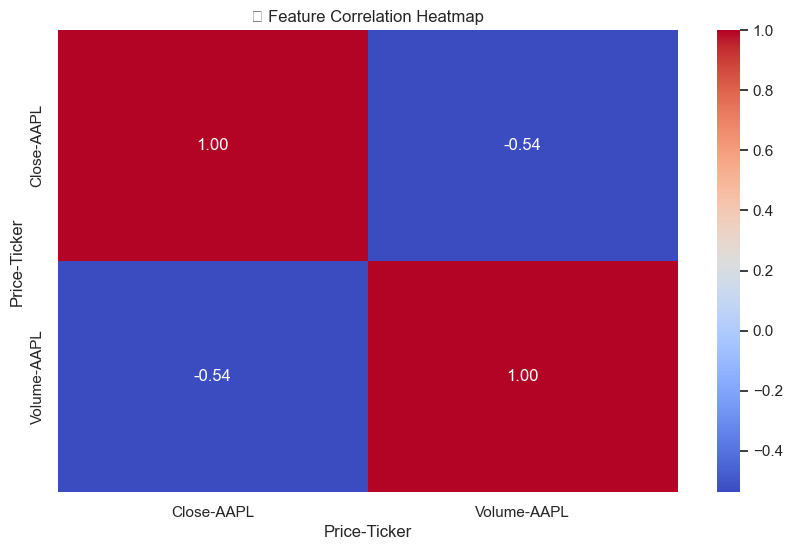

In [59]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(stock_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📌 Feature Correlation Heatmap")
plt.show()

# -ve indicated inverse relation between volume and closing price

Volume distribution

C:\Users\asus\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


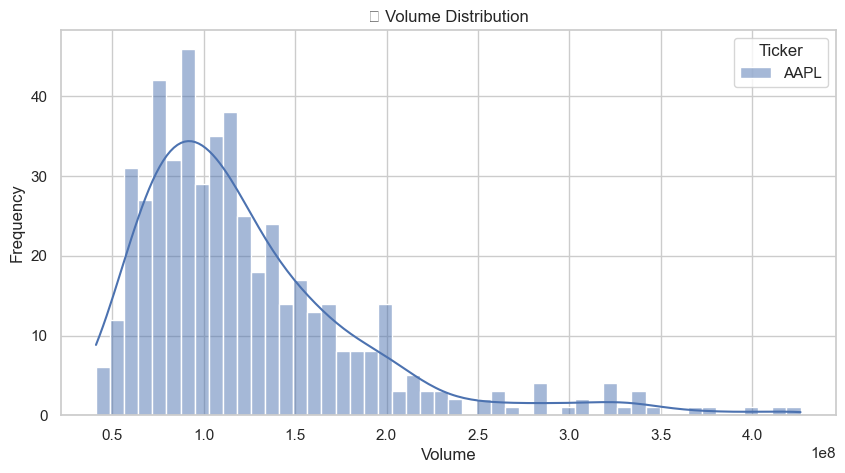

In [60]:
# Volume distribution
plt.figure(figsize=(10, 5))
sns.histplot(stock_data['Volume'], bins=50, kde=True, color='purple')
plt.title("📊 Volume Distribution")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

In [61]:

stock_data.dropna(inplace=True)


X = stock_data[['Close', 'Volume']]
y = stock_data['Close'].shift(-1)

X = X[:-1]
y = y[:-1]


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression

In [63]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


Decision tree

In [64]:
dt_model = DecisionTreeRegressor(max_depth=3)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


Random forest

In [65]:
rf_model = RandomForestRegressor(n_estimators=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [66]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("📊 Evaluation Metrics for Linear Regression:")
print("MAE  :", mae_lr) # mean abs error
print("RMSE :", rmse_lr) # root mean sqaured
print("R²   :", r2_lr) # more is better

📊 Evaluation Metrics for Linear Regression:
MAE  : 1.8431851515157058
RMSE : 2.457309016039807
R²   : 0.9944434739811115


In [67]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("📊 Evaluation Metrics for Decision Tree:")
print("MAE  :", mae_dt)
print("RMSE :", rmse_dt)
print("R²   :", r2_dt)

📊 Evaluation Metrics for Decision Tree:
MAE  : 3.9374672814960774
RMSE : 4.769967434000327
R²   : 0.9790629913695429


In [68]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("📊 Evaluation Metrics for Random Forest:")
print("MAE  :", mae_rf)
print("RMSE :", rmse_rf)
print("R²   :", r2_rf)

📊 Evaluation Metrics for Random Forest:
MAE  : 2.049744547475684
RMSE : 2.892119106510314
R²   : 0.9923030945212015


In [69]:

metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'R² Score': [r2_lr, r2_dt, r2_rf]
})

display(metrics_df)


,Model,MAE,RMSE,R² Score
0,Linear Regression,1.843185,2.457309,0.994443
1,Decision Tree,3.937467,4.769967,0.979063
2,Random Forest,2.049745,2.892119,0.992303


# here linear is best because apple is stable stock. for volatile  stocks like tesla , random / decision tree is better

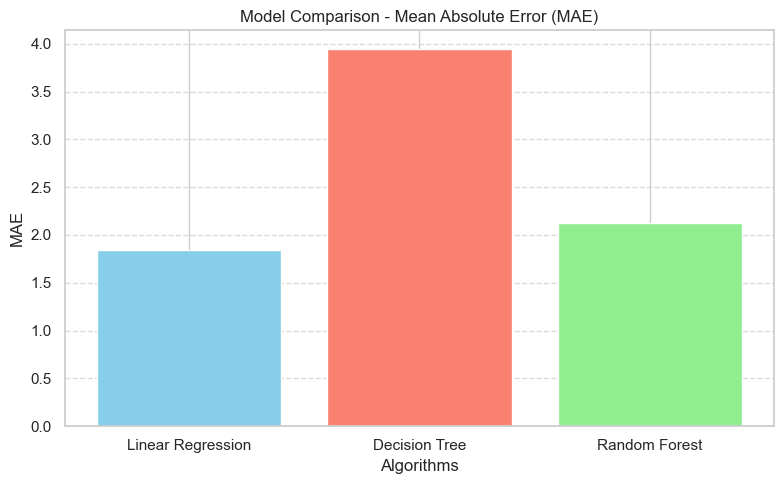

In [70]:


models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_values = [1.845605, 3.942632, 2.127624]

plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Model Comparison - Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Algorithms')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


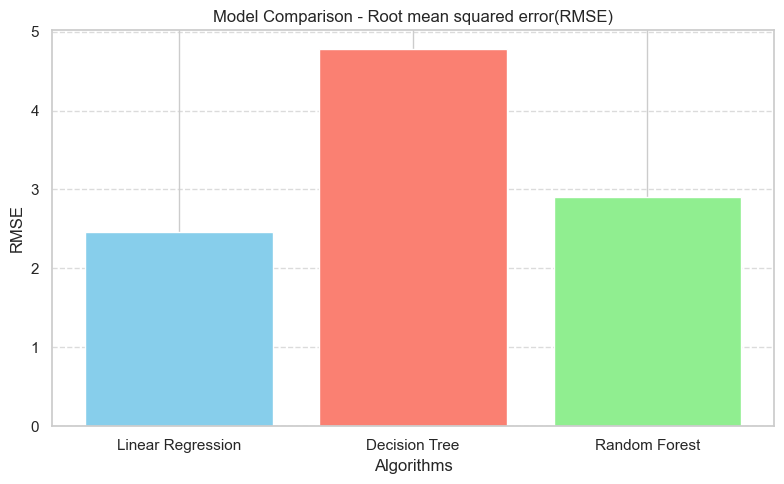

In [71]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_values = [2.460534 , 4.776223, 2.904457 ]


plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Model Comparison - Root mean squared error(RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Algorithms')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


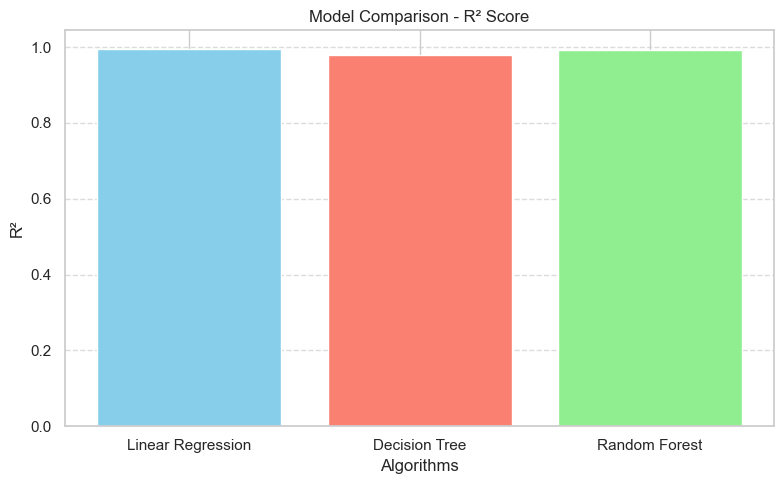

In [72]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_values = [0.994443	, 0.979063, 0.992258 ]

plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Model Comparison - R² Score')
plt.ylabel('R²')
plt.xlabel('Algorithms')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


actual_direction_lr = (y_test.values[1:] > y_test.values[:-1]).astype(int)
predicted_direction_lr = (y_pred_lr[1:] > y_pred_lr[:-1]).astype(int)


min_len = min(len(actual_direction_lr), len(predicted_direction_lr))
actual_direction_lr = actual_direction_lr[:min_len]
predicted_direction_lr = predicted_direction_lr[:min_len]

print("📊 Direction-Based Metrics for Linear Regression:")
print("Accuracy :", accuracy_score(actual_direction_lr, predicted_direction_lr))
print("Precision:", precision_score(actual_direction_lr, predicted_direction_lr))
print("Recall   :", recall_score(actual_direction_lr, predicted_direction_lr))
print("F1 Score :", f1_score(actual_direction_lr, predicted_direction_lr))


📊 Direction-Based Metrics for Linear Regression:
Accuracy : 0.95
Precision: 0.9583333333333334
Recall   : 0.9387755102040817
F1 Score : 0.9484536082474226


In [74]:

actual_direction_dt = (y_test.values[1:] > y_test.values[:-1]).astype(int)
predicted_direction_dt = (y_pred_dt[1:] > y_pred_dt[:-1]).astype(int)

min_len = min(len(actual_direction_dt), len(predicted_direction_dt))
actual_direction_dt = actual_direction_dt[:min_len]
predicted_direction_dt = predicted_direction_dt[:min_len]

print("📊 Direction-Based Metrics for Decision Tree:")
print("Accuracy :", accuracy_score(actual_direction_dt, predicted_direction_dt))
print("Precision:", precision_score(actual_direction_dt, predicted_direction_dt))
print("Recall   :", recall_score(actual_direction_dt, predicted_direction_dt))
print("F1 Score :", f1_score(actual_direction_dt, predicted_direction_dt))


📊 Direction-Based Metrics for Decision Tree:
Accuracy : 0.91
Precision: 1.0
Recall   : 0.8163265306122449
F1 Score : 0.898876404494382


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


actual_direction = (y_test.values[1:] > y_test.values[:-1]).astype(int)
predicted_direction = (y_pred_rf[1:] > y_pred_rf[:-1]).astype(int)


min_len = min(len(actual_direction), len(predicted_direction))
actual_direction = actual_direction[:min_len]
predicted_direction = predicted_direction[:min_len]


print("📌 Direction-Based Classification Metrics (Random Forest):")
print("Accuracy:", accuracy_score(actual_direction, predicted_direction))
print("Precision:", precision_score(actual_direction, predicted_direction))
print("Recall:", recall_score(actual_direction, predicted_direction))
print("F1 Score:", f1_score(actual_direction, predicted_direction))

# acc vs preci vs recall
#f1 is harmoic mean of precision and recall

📌 Direction-Based Classification Metrics (Random Forest):
Accuracy: 0.96
Precision: 0.9591836734693877
Recall: 0.9591836734693877
F1 Score: 0.9591836734693877
